In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import re

from pathlib import Path

%matplotlib inline

In [70]:
RESULTS_DIR_PATH = Path("/nfs/students/summer-term-2019/project-4/andreas/pycharm_project4/graph/results/")
RESULTS_DATE_FOLDER = Path("2019-07-16_18-10-07")
METRICS = ['test_auc',
'test_ap',
'naive_precision',
'naive_recall',
'naive_time',
'naive_size',
'lsh_precision',
'lsh_recall',
'lsh_time',
'lsh_size',
'compare_precision',
'compare_recall']

In [71]:
def parse_filename(filename: str):
    """
    Extracts Results Meta-Information from filename
    """
    # Check if is indeed pickle file
    assert filename.endswith('.pkl')
    filename = filename[:-4] # Remove .pkl
    
    # Retrieve individual attributes
    attributes = filename.split("_")[1:] # Split and remove 'GS'
    assert len(attributes) == 5
    
    params = {
        'dataset': attributes[0],
        'dist_metric': attributes[1],
        'bands': int(attributes[2]),
        'rows': int(attributes[3]),
        'percentiles': float(attributes[4])
    }
    
    return params
    

def extract_experiment_results(path: Path):
    """
    path: Folder containing individual .pkl files with experiment results
    
    """
    experiments = []
    
    for file in path.glob('*.pkl'):
        meta_inf = parse_filename(file.parts[-1])
        with file.open('rb') as f:     
            results = pk.load(file.open('rb'))
            
            for metric in METRICS:
                try:
                    meta_inf[metric] = results[metric]  
                except KeyError as e:
                    print(f"Metric {metric} not found in saved results from experiment {file.parts[-1]}")
        
        lsh_prec, lsh_rec = meta_inf['lsh_precision'], meta_inf['lsh_recall']
        f1_score = (2 * lsh_prec * lsh_rec) / (lsh_prec + lsh_rec)
        meta_inf['lsh_f1'] = f1_score
        
        naive_prec, naive_rec = meta_inf['naive_precision'], meta_inf['naive_recall']
        f1_score = (2 * naive_prec * naive_rec) / (naive_prec + naive_rec)
        meta_inf['naive_f1'] = f1_score
    
        experiments.append(meta_inf)
    
    cols = ['dataset', 'bands', 'rows', 'dist_metric'] + [m for m in METRICS if m in results]  + ["lsh_f1", "naive_f1"]  
    return pd.DataFrame(experiments)[cols]

In [72]:
df = extract_experiment_results(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER)
#df = df[df['dist_metric'] == 'cosine']
df.to_csv(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER / 'results.csv') # Save df to csv file

In [73]:
df

,dataset,bands,rows,dist_metric,test_auc,test_ap,naive_precision,naive_recall,naive_time,naive_size,lsh_precision,lsh_recall,lsh_time,lsh_size,compare_precision,compare_recall,lsh_f1,naive_f1
0,Cora,8,32,cosine,0.952072,0.948960,0.044173,0.809953,0.000664,29.333056,0.074693,0.567991,4.397312,0.513304,1.000000,0.414725,0.132024,0.083777
1,Cora,32,16,cosine,0.950102,0.942673,0.053648,0.767151,0.000539,29.333056,0.054801,0.767151,14.215525,4.781248,0.999985,0.978933,0.102295,0.100282
2,Cora,8,196,cosine,0.946343,0.937561,0.044345,0.814766,0.000662,29.333056,0.686981,0.050788,2.231290,0.010472,1.000000,0.004024,0.094584,0.084111
3,Cora,16,16,cosine,0.960260,0.958576,0.054420,0.760905,0.000642,29.333056,0.056744,0.753737,7.434709,2.412440,0.999985,0.949982,0.105543,0.101575
4,Cora,16,64,cosine,0.943315,0.934821,0.043614,0.811694,0.000679,29.333056,0.164447,0.369138,7.679333,0.169296,1.000000,0.120615,0.227531,0.082781
5,Cora,32,128,cosine,0.947244,0.940487,0.044999,0.809646,0.000619,29.333056,0.392577,0.174381,8.632306,0.064904,1.000000,0.024688,0.241492,0.085259
6,Cora,32,64,cosine,0.944331,0.937246,0.053917,0.760803,0.000882,29.333056,0.106082,0.462216,15.074119,0.437128,1.000000,0.308786,0.172560,0.100698
7,Cora,32,128,cosine,0.944302,0.935292,0.055824,0.764387,0.000759,29.333056,0.356642,0.166598,9.496886,0.063032,1.000000,0.034115,0.227108,0.104049
8,Cora,8,64,cosine,0.955745,0.951035,0.044897,0.809543,0.000665,29.333056,0.181217,0.261008,3.268147,0.085008,1.000000,0.079880,0.213914,0.085077
9,Cora,16,16,cosine,0.957549,0.952272,0.044641,0.810874,0.001782,29.333056,0.046919,0.799508,7.477906,2.674872,1.000000,0.938114,0.088637,0.084624


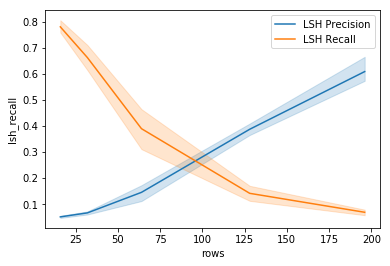

In [74]:
# Plot influence of number of rows in signature matrix on performance
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

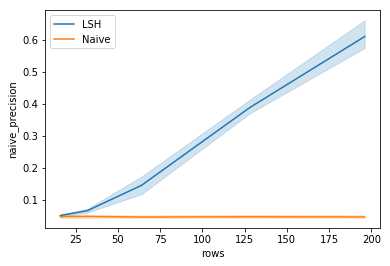

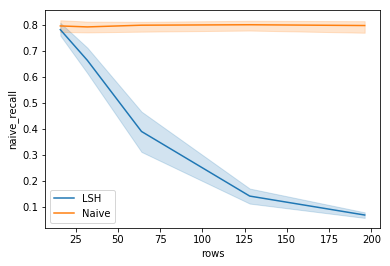

In [75]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_recall', data=df, label='Naive')

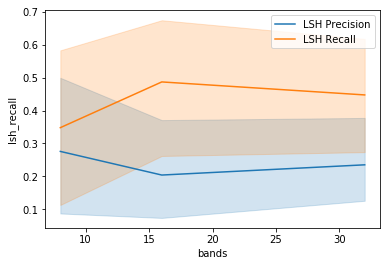

In [76]:
# Same for number of bands 
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

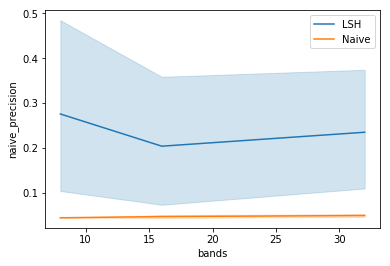

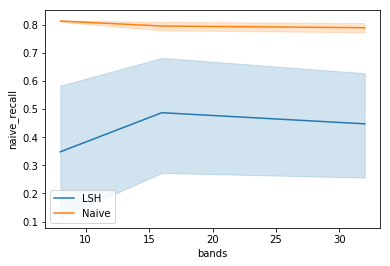

In [77]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_recall', data=df, label='Naive')

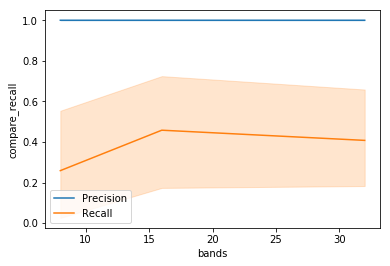

In [78]:
# Plot influence of number of bands on precision/ recall of naive matrix
sns.lineplot(x='bands', y='compare_precision', data=df, label='Precision')
sns.lineplot(x='bands', y='compare_recall', data=df, label='Recall')
plt.legend()

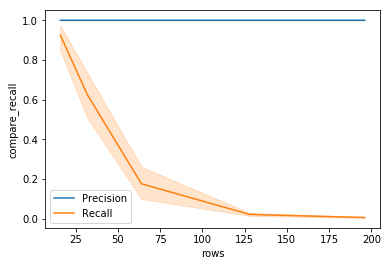

In [79]:
# Plot influence of number of rows on precision/ recall of naive matrix
sns.lineplot(x='rows', y='compare_precision', data=df, label='Precision')
sns.lineplot(x='rows', y='compare_recall', data=df, label='Recall')
plt.legend()

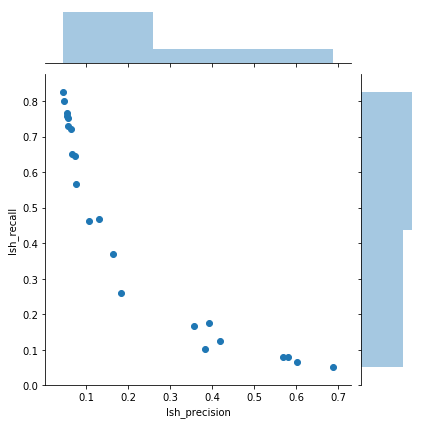

In [80]:
sns.jointplot(x='lsh_precision', y='lsh_recall', data=df)

# Time and Memory

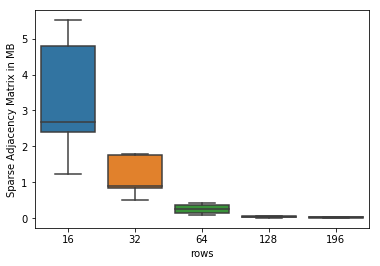

<Figure size 432x288 with 0 Axes>

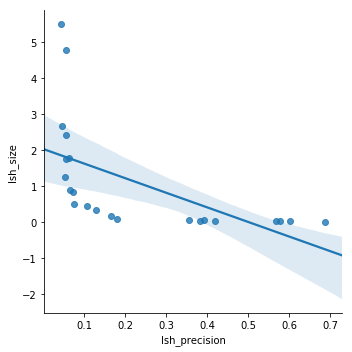

In [81]:
# Plot average sizes of sparse adjacency matrices
ax = sns.boxplot(x='rows', y='lsh_size', data=df)
ax.set_ylabel("Sparse Adjacency Matrix in MB")
plt.figure()
sns.lmplot(x='lsh_precision', y='lsh_size', data=df)

Text(0, 0.5, 'Adjacency Matrix in MB')

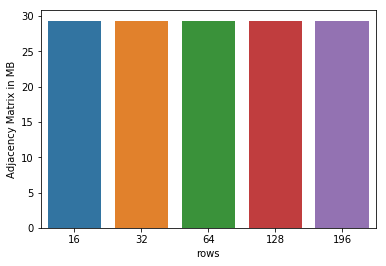

In [86]:
ax = sns.barplot(x='rows', y='naive_size', data=df)
ax.set_ylabel("Adjacency Matrix in MB")

Text(0, 0.5, 'Adjacency Matrix in MB')

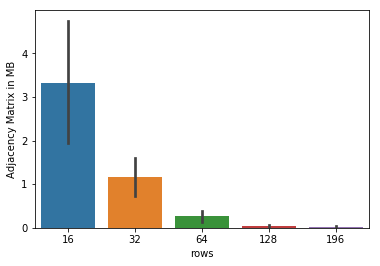

In [87]:
ax = sns.barplot(x='rows', y='lsh_size', data=df)
ax.set_ylabel("Adjacency Matrix in MB")

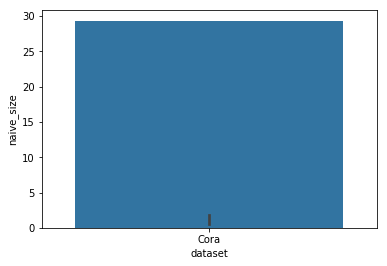

In [92]:
ax = sns.barplot(x='dataset', y='lsh_size', data=df)
ax = sns.barplot(x='dataset', y='naive_size', data=df)

In [ ]:
ax = sns.barplot(x='dataset', y='lsh_size', data=df)
ax = sns.barplot(x='dataset', y='naive_size', data=df)

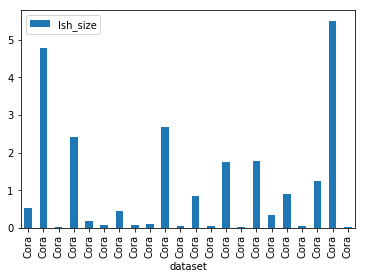

In [91]:
# Create plot for each dataset with average sizes for naive

Text(0.5, 0, 'Sparse Adjacency Matrix in MB')

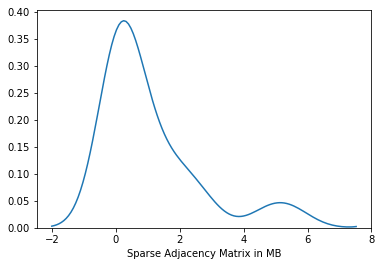

In [83]:
ax = sns.distplot(df['lsh_size'], hist=False)
ax.set_xlabel("Sparse Adjacency Matrix in MB")

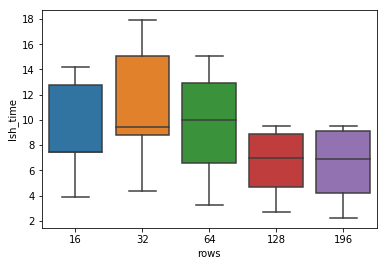

<Figure size 432x288 with 0 Axes>

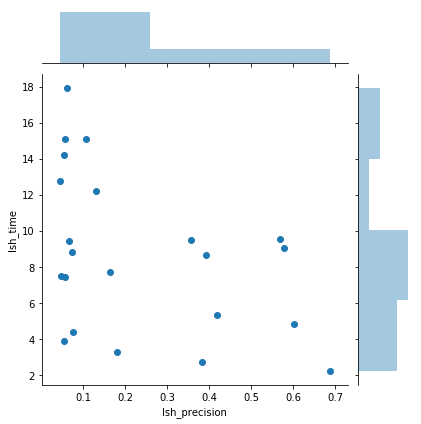

In [84]:
# Plot average distributions of adjacency matrix sizes and memory consumption
sns.boxplot(x='rows', y='lsh_time', data=df)
plt.figure()
sns.jointplot(x='lsh_precision', y='lsh_time', data=df)

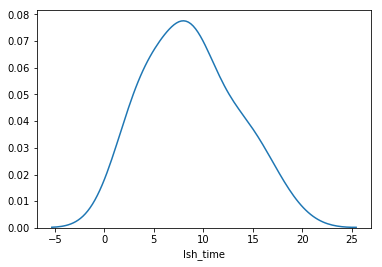

In [85]:
sns.distplot(df['lsh_time'], hist=False)